In [4]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import transform as tf
img = data.astronaut()

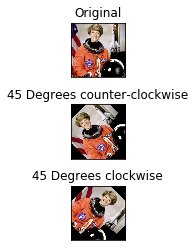

In [5]:
# Similarity Transform
tform = tf.SimilarityTransform(scale=1, rotation=math.pi/4,
translation=(img.shape[0]/2, -100))
print(tform)
output1 = tf.warp(img, tform)
output2 = tf.warp(img, tform.inverse)
output = [img, output1, output2]
titles = ['Original', '45 Degrees counter-clockwise', '45 Degrees clockwise']
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

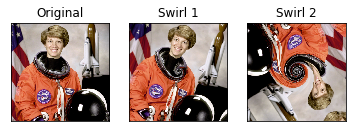

In [6]:
# Swirl

output1 = tf.swirl(img, rotation=50, strength=10, radius=120, mode='reflect')
output2 = tf.swirl(img, rotation=10, strength=20, radius=200, mode='reflect')
output = [img, output1, output2]
titles = ['Original', 'Swirl 1', 'Swirl 2']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(output[i], interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

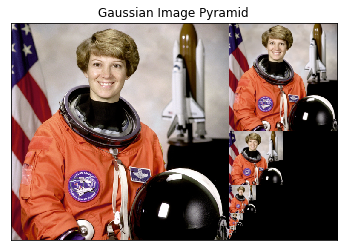

In [7]:
# Gaussian Pyramid

rows, cols, dim = img.shape
pyramid = tuple(tf.pyramid_gaussian(img, downscale=2, multichannel = True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)

plt.xticks([])
plt.yticks([])
plt.title('Gaussian Image Pyramid')
    
plt.show()

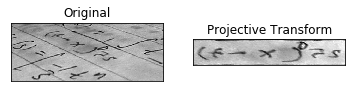

In [8]:
# Projective Transform

img = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform = tf.ProjectiveTransform()
tform.estimate(src, dst)
output1 = tf.warp(img, tform, output_shape=(50, 300))

output = [img, output1]
titles = ['Original', 'Projective Transform']

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

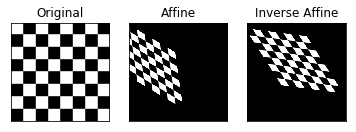

In [10]:
img = data.checkerboard()
tform = tf.AffineTransform(scale=(1.2, 1.1), rotation=1, shear=0.7,
translation=(210, 50))
output1 = tf.warp(img, tform, output_shape=(350, 350))
output2 = tf.warp(img, tform.inverse, output_shape=(350, 350))
output = [img, output1, output2]
titles = ['Original', 'Affine', 'Inverse Affine']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
plt.show()

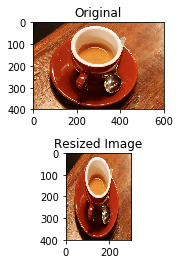

In [11]:
# Resizing the image

img = data.coffee()

output1 = tf.resize(img, (img.shape[0], img.shape[1] * 1/2), mode='reflect')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

output = [img, output1]
titles = ['Original', 'Resized Image']

for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
plt.show()